## Курсовая работа Болилого Антона "Прогноз цен на недвижимость" (draft)

### Этап 1: анализ и очистка данных датасета

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

Загружаем тренировочный и тестовый датасеты:

In [3]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Изучаем информацию о данных в датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [6]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [7]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
data.keys()

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

###### Шаг 1: работаем с Healthcare_1

Удалим колонку Healthcare_1, поскольку более 45% данных не заполнено, при этом показатель абстрактен и не понятно, как незаполненные данные можно восстановить:

In [9]:
drop_Healthcare_1 = data.drop('Healthcare_1', axis=1)

In [10]:
data = drop_Healthcare_1

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


###### Шаг 2: работаем с HouseYear

Характеристики колонки показывают, что данные заполнены не корректно:

In [12]:
data.loc[data['HouseYear'] > 2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


В квартире с id=10814 год постройки, по видимости, находится в интервале между 2005 и 2011 гг., поэтому заменим средним значением между этими годами.
В квартире с id=11607 в годе постройки ошибка, заменим 4 на 1 (по площади 2к кв похоже на "брежневку")

In [13]:
data.loc[data['HouseYear']==20052011, 'HouseYear']=2008

In [14]:
data.loc[data['HouseYear']==4968, 'HouseYear']=1968

In [15]:
data.loc[data['HouseYear'] > 2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


###### Шаг 3: работаем с Rooms

Сделаем предположение, что квартиры с более, чем 5 комнатами - это выброс:

In [16]:
data.loc[data['Rooms'] > 5] #Нереальная площадь квартир в выборке подтверждает наше предположение

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


Заменим количество комнат в этих квартирах в соответствии с логикой их площадей:

In [17]:
data.loc[data['Rooms']==10,'Rooms']=2

In [18]:
data.loc[data['Rooms']==19,'Rooms']=1

In [19]:
data.loc[data['Rooms']==6,'Rooms']=2

In [20]:
data.loc[[377, 1454, 2170, 8849], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,2.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [21]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.886700,56.315775,37.199645,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812852,21.058732,86.241209,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,5.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


Построим диаграмму рассеивания по Rooms c зависимостью от цены ('Price'):

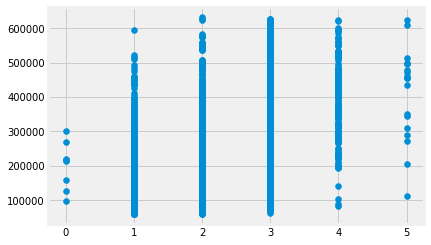

In [22]:
plt.scatter(data['Rooms'], data['Price'])

После проведенных корректировок график не выявил очевидных выбросов

Кроме того, описание показало, что есть квартиры с 0 комнат, что явно является не корректным:

In [23]:
data.loc[data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


Удалять данные пока не будем, проставим количество комнат, исходя из логики общей S:

In [24]:
data.loc[1397, 'Rooms']=5

In [25]:
data.loc[1981, 'Rooms']=5

In [26]:
data.loc[2269, 'Rooms']=1

In [27]:
data.loc[3911, 'Rooms']=1

In [28]:
data.loc[4366, 'Rooms']=2

In [29]:
data.loc[6149, 'Rooms']=1

In [30]:
data.loc[8834, 'Rooms']=3

Квартира в нашей выборке "с нулевым Rooms", имеющая общую S = 2.377248, явно относится к некорректным данным. Ее мы удалим:

In [31]:
data = data.drop(4853, axis=0)

In [32]:
data.loc[[1397, 1981, 2269, 3911, 4366, 6149, 8834], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,5.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,1.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,1.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,2.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
6149,3159,88,1.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,3.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


###### Шаг 4: работаем с Square

Сделаем предположение, что S квартиры не может быть менее 18 кв.м

In [33]:
data.loc[data['Square'] < 18]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25,4756,16,5,8,B,88871.750230
3166,15127,150,1.0,17.046188,20.036232,8.0,7,12.0,1982,0.300323,B,B,52,10311,6,1,9,B,74222.110465
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,3,4,A,77835.185808


Данные явно не корректны, удалим их:

In [34]:
index_array_square = data.loc[data['Square'] < 18].index
index_array_square

Int64Index([ 212, 1316, 1608, 1891, 3166, 3280, 3413, 4739, 4900, 5617, 6392,
            6945, 7767, 8030, 8283, 9294, 9613],
           dtype='int64')

In [35]:
data = data.drop(index_array_square, axis=0)

In [36]:
data.loc[data['Square'] < 18]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


Кроме того, в датасете есть квартиры с площадью 150 кв.м и больше:

In [37]:
data.loc[data['Square'] > 150]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767


Построим диаграмму рассеивания по Square c зависимостью от цены ('Price'):

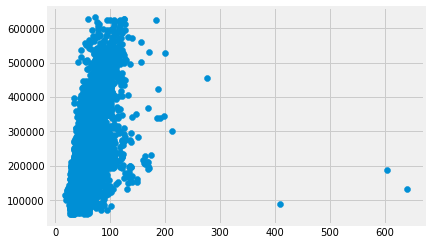

In [38]:
plt.scatter(data['Square'], data['Price'])

График выявил явные выбросы по квартирам, площадь которых больше 200 кв.м
Посмотрим на график без этих выбросов:

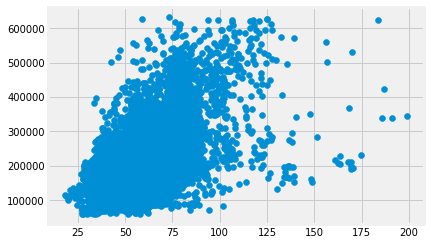

In [39]:
plt.scatter(data.loc[data['Square']<200,'Square'], 
                     data.loc[data['Square']<200, 'Price'])

Получился более логичный график, где цена растет в зависимости от роста S квартиры

In [40]:
data.loc[data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


Выведем среднее значение общей S квартиры, приходящейся на 1 комнату:

In [41]:
rooms_ratio = (data['Square']/data['Rooms']).mean()
rooms_ratio

32.558070234009776

Сделаем предположение, что если общая S квартиры больше, чем количество комнат, умноженное на среднюю S комнаты (rooms_ratio), то это выброс. В таком случае, заменим значения выбросов на значения = (кол-во комнат * средняя S комнаты):

In [42]:
def change_square(df):
    df.loc[df['Square'] > (df['Rooms']*rooms_ratio), 'Square'] = df['Rooms']*rooms_ratio
    return df

In [43]:
data = change_square(data)

In [44]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9982.000000,9982.000000,9982.000000,9982.000000,7870.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.242027,6.281206,8.526548,12.616009,1984.874474,0.118806,24.693348,5353.729914,8.047285,1.319074,4.231717,214145.166434
std,4859.298786,43.595389,0.812404,19.419746,86.323079,28.585835,5.234607,6.770880,18.413935,0.119043,17.529554,4006.490401,23.851710,1.492886,4.808100,92751.005491
min,0.000000,0.000000,1.000000,18.509177,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.250000,20.000000,1.000000,32.558070,22.808582,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153929.816127
50%,8391.500000,36.000000,2.000000,50.624072,32.790060,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192307.051739
75%,12588.250000,75.000000,2.000000,65.116140,45.144624,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249120.464088
max,16798.000000,209.000000,5.000000,162.790351,7480.592129,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


###### Шаг 5: работаем с LifeSquare. 

In [45]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9982.000000,9982.000000,9982.000000,9982.000000,7870.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.242027,6.281206,8.526548,12.616009,1984.874474,0.118806,24.693348,5353.729914,8.047285,1.319074,4.231717,214145.166434
std,4859.298786,43.595389,0.812404,19.419746,86.323079,28.585835,5.234607,6.770880,18.413935,0.119043,17.529554,4006.490401,23.851710,1.492886,4.808100,92751.005491
min,0.000000,0.000000,1.000000,18.509177,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.250000,20.000000,1.000000,32.558070,22.808582,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153929.816127
50%,8391.500000,36.000000,2.000000,50.624072,32.790060,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192307.051739
75%,12588.250000,75.000000,2.000000,65.116140,45.144624,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249120.464088
max,16798.000000,209.000000,5.000000,162.790351,7480.592129,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


Выведем коэффициент отношения жилой S к общей S, для того чтобы заполнить пустые значения:

In [46]:
square_ratio = (data['LifeSquare']/data['Square']).mean()
square_ratio

0.7250111435137141

Заменим пустые LifeSquare данными общей S, умноженными на выведенный коэффициент:

In [47]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square']*square_ratio)

In [48]:
data.loc[data['LifeSquare'] < 0.1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 19 columns):
Id               9982 non-null int64
DistrictId       9982 non-null int64
Rooms            9982 non-null float64
Square           9982 non-null float64
LifeSquare       9982 non-null float64
KitchenSquare    9982 non-null float64
Floor            9982 non-null int64
HouseFloor       9982 non-null float64
HouseYear        9982 non-null int64
Ecology_1        9982 non-null float64
Ecology_2        9982 non-null object
Ecology_3        9982 non-null object
Social_1         9982 non-null int64
Social_2         9982 non-null int64
Social_3         9982 non-null int64
Helthcare_2      9982 non-null int64
Shops_1          9982 non-null int64
Shops_2          9982 non-null object
Price            9982 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.8+ MB


Выделим данные, по которым значения больше max значения по общей S:

In [50]:
data.loc[data['LifeSquare'] > 162.790351]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
1641,11055,151,1.0,32.558070,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698
1981,7917,27,5.0,162.790351,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,162.790351,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
3651,5300,30,3.0,97.674211,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4690,2307,102,1.0,32.558070,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6332,8961,27,1.0,32.558070,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
6977,11602,30,2.0,65.116140,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


Cохраним данные по квартире с индексом 4328, предположив, что в данных неверно установлена дробь:

In [51]:
data.loc[data['LifeSquare'] > 7480, 'LifeSquare'] = data.loc[data['LifeSquare'] > 7480, 'LifeSquare']/100

In [52]:
data.loc[4328, :]

Id                   16550
DistrictId              27
Rooms                    3
Square             81.6944
LifeSquare         74.8059
KitchenSquare            1
Floor                    9
HouseFloor              17
HouseYear             2016
Ecology_1        0.0176471
Ecology_2                B
Ecology_3                B
Social_1                 2
Social_2               469
Social_3                 0
Helthcare_2              0
Shops_1                  0
Shops_2                  B
Price               217357
Name: 4328, dtype: object

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 19 columns):
Id               9982 non-null int64
DistrictId       9982 non-null int64
Rooms            9982 non-null float64
Square           9982 non-null float64
LifeSquare       9982 non-null float64
KitchenSquare    9982 non-null float64
Floor            9982 non-null int64
HouseFloor       9982 non-null float64
HouseYear        9982 non-null int64
Ecology_1        9982 non-null float64
Ecology_2        9982 non-null object
Ecology_3        9982 non-null object
Social_1         9982 non-null int64
Social_2         9982 non-null int64
Social_3         9982 non-null int64
Helthcare_2      9982 non-null int64
Shops_1          9982 non-null int64
Shops_2          9982 non-null object
Price            9982 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.8+ MB


Сделаем предположение, что при установленной min общей S квартиры = 18, жилая S не может быть меньше 9. 

In [54]:
data.loc[data['LifeSquare'] < 9]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,97.674211,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,1,11,B,286564.441972
134,12613,6,2.0,65.116140,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,0,0,A,174687.566186
160,3522,6,1.0,32.558070,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,0,0,B,193361.229815
270,15215,17,1.0,32.558070,5.941401,1.0,7,1.0,2015,0.000000,B,B,18,3374,5,1,2,B,212290.684086
279,8727,1,2.0,65.116140,4.634049,1.0,5,1.0,2017,0.007122,B,B,1,264,0,0,1,B,232726.628137
363,15751,9,1.0,32.558070,1.251846,1.0,11,18.0,2017,0.161532,B,B,25,5648,1,2,4,B,134910.715588
475,6333,27,2.0,64.049695,4.008230,1.0,5,5.0,2017,0.017647,B,B,2,469,0,0,0,B,189477.560210
477,8849,45,1.0,32.558070,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,325600.765809


По аналогии с пустыми данными, заменим LifeSquare < 9 данными общей S, умноженными на square_ratio:

In [55]:
index_array_lifesquare = data.loc[data['LifeSquare'] < 9].index
index_array_lifesquare

Int64Index([  26,   95,  134,  158,  160,  270,  279,  363,  475,  477,
            ...
            9316, 9396, 9576, 9602, 9748, 9756, 9813, 9828, 9888, 9954],
           dtype='int64', length=195)

In [56]:
data.loc[index_array_lifesquare, 'LifeSquare'] = data.loc[index_array_lifesquare, 'Square']*square_ratio

In [57]:
data.loc[data['LifeSquare'] < 9]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [58]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.541679,6.281206,8.526548,12.616009,1984.874474,0.118806,24.693348,5353.729914,8.047285,1.319074,4.231717,214145.166434
std,4859.298786,43.595389,0.812404,19.419746,18.797140,28.585835,5.234607,6.770880,18.413935,0.119043,17.529554,4006.490401,23.851710,1.492886,4.808100,92751.005491
min,0.000000,0.000000,1.000000,18.509177,10.523868,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.250000,20.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153929.816127
50%,8391.500000,36.000000,2.000000,50.624072,33.673635,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192307.051739
75%,12588.250000,75.000000,2.000000,65.116140,46.785567,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249120.464088
max,16798.000000,209.000000,5.000000,162.790351,638.163193,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


###### Шаг 6: работаем с dummies

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 19 columns):
Id               9982 non-null int64
DistrictId       9982 non-null int64
Rooms            9982 non-null float64
Square           9982 non-null float64
LifeSquare       9982 non-null float64
KitchenSquare    9982 non-null float64
Floor            9982 non-null int64
HouseFloor       9982 non-null float64
HouseYear        9982 non-null int64
Ecology_1        9982 non-null float64
Ecology_2        9982 non-null object
Ecology_3        9982 non-null object
Social_1         9982 non-null int64
Social_2         9982 non-null int64
Social_3         9982 non-null int64
Helthcare_2      9982 non-null int64
Shops_1          9982 non-null int64
Shops_2          9982 non-null object
Price            9982 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.8+ MB


Из описания видно, что колонки Ecology_2,3 имеют строковые значения. Проверим, какие именно:

In [60]:
data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [61]:
data['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

В нашем случае можно заменить символы A и B на бинарные значения, без перегрузки данных новыми признаками:

In [62]:
data = pd.get_dummies(data)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9999
Data columns (total 22 columns):
Id               9982 non-null int64
DistrictId       9982 non-null int64
Rooms            9982 non-null float64
Square           9982 non-null float64
LifeSquare       9982 non-null float64
KitchenSquare    9982 non-null float64
Floor            9982 non-null int64
HouseFloor       9982 non-null float64
HouseYear        9982 non-null int64
Ecology_1        9982 non-null float64
Social_1         9982 non-null int64
Social_2         9982 non-null int64
Social_3         9982 non-null int64
Helthcare_2      9982 non-null int64
Shops_1          9982 non-null int64
Price            9982 non-null float64
Ecology_2_A      9982 non-null uint8
Ecology_2_B      9982 non-null uint8
Ecology_3_A      9982 non-null uint8
Ecology_3_B      9982 non-null uint8
Shops_2_A        9982 non-null uint8
Shops_2_B        9982 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
memory usage: 1.7 MB


In [64]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.541679,6.281206,8.526548,12.616009,1984.874474,0.118806,...,8.047285,1.319074,4.231717,214145.166434,0.009717,0.990283,0.027550,0.972450,0.082448,0.917552
std,4859.298786,43.595389,0.812404,19.419746,18.797140,28.585835,5.234607,6.770880,18.413935,0.119043,...,23.851710,1.492886,4.808100,92751.005491,0.098102,0.098102,0.163687,0.163687,0.275060,0.275060
min,0.000000,0.000000,1.000000,18.509177,10.523868,0.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4166.250000,20.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153929.816127,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8391.500000,36.000000,2.000000,50.624072,33.673635,6.000000,7.000000,13.000000,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192307.051739,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12588.250000,75.000000,2.000000,65.116140,46.785567,9.000000,12.000000,17.000000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249120.464088,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.000000,209.000000,5.000000,162.790351,638.163193,2014.000000,42.000000,117.000000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Этап 2: Разбивка датасета на тренировочный и валидационный

Разобьем сразу датасет на тренировочный и валидационный:

In [65]:
train,valid=train_test_split(data,test_size=0.25, random_state=42, shuffle=True)

In [66]:
data.shape

(9982, 22)

In [67]:
train.shape, valid.shape

((7486, 22), (2496, 22))

### Этап 3: Строим модель (1 итерация):

In [68]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [69]:
feats=['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [70]:
from sklearn.linear_model import LinearRegression as LR, Ridge
from sklearn.ensemble import RandomForestRegressor as RF

In [71]:
model=LR()

In [72]:
%%time
model.fit(train.loc[:,feats],train['Price'])

Wall time: 23 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
y_pred=model.predict(valid.loc[:,feats])

In [74]:
y_pred

array([268925.19278536, 221787.02628052, 277246.96570689, ...,
       119770.52883288, 130614.85758713, 262448.57323367])

In [75]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [76]:
r2(train['Price'],model.predict(train.loc[:,feats]))

0.5099061656379431

In [77]:
r2(valid['Price'],y_pred)

0.5236275138723767

#### Стандартизируем признаки:

In [78]:
model.coef_

array([ 4.53048498e+02,  3.28461435e+02,  2.90004387e+03, -6.26040581e+01,
        1.14181802e+01,  1.80525942e+03,  6.85531993e+02, -1.73184994e+01,
       -4.84988071e+04,  1.72065825e+03, -3.02335696e+00,  1.83954585e+02,
        5.22238822e+03, -1.09674203e+03, -2.39832446e+04,  2.39832446e+04,
        1.29991150e+04, -1.29991150e+04, -9.32098283e+03,  9.32098283e+03])

In [79]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

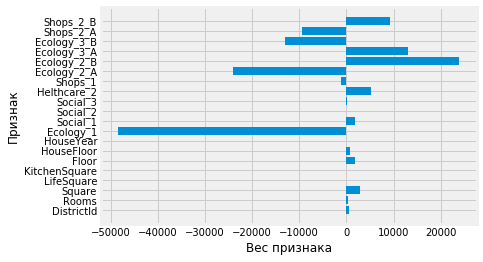

In [80]:
plt.barh(feats, model.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [81]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,...,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000,7486.000000
mean,8398.038739,50.532327,1.890729,52.088258,37.675580,6.406492,8.521774,12.586294,1984.833022,0.118893,...,8.192893,1.326075,4.261021,214078.003241,0.009351,0.990649,0.029255,0.970745,0.078814,0.921186
std,4828.063796,43.757615,0.810800,19.351767,19.513522,32.896112,5.231296,6.742538,18.497480,0.118864,...,24.145538,1.483782,4.829075,93160.057003,0.096253,0.096253,0.168531,0.168531,0.269466,0.269466
min,2.000000,0.000000,1.000000,18.509177,10.845368,0.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4231.500000,19.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153429.984746,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8419.500000,35.000000,2.000000,50.837204,33.744721,6.000000,7.000000,12.000000,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192307.051739,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12584.500000,77.000000,2.000000,65.116140,46.852152,9.000000,12.000000,17.000000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249406.583028,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.000000,208.000000,5.000000,162.790351,638.163193,2014.000000,37.000000,117.000000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [83]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)

valid_scaled = scaler.fit_transform(valid)
valid_scaled = pd.DataFrame(valid_scaled, columns=valid.columns)

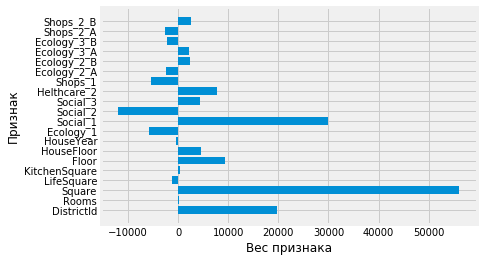

In [84]:
model.fit(train_scaled.loc[:,feats], train['Price'])

plt.barh(feats, model.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [85]:
important_features = [
    feats
    for feats, weight in zip(feats, model.coef_.flatten())
    if np.abs(weight) > 10000
]

print(important_features)

['DistrictId', 'Square', 'Social_1', 'Social_2']


In [86]:
y_pred_scaled=model.predict(valid_scaled.loc[:,feats])

In [87]:
r2(train['Price'],model.predict(train_scaled.loc[:,feats]))

0.5099061656379431

In [88]:
r2(valid['Price'],y_pred_scaled), r2(valid['Price'],y_pred)

(0.5243290329070557, 0.5236275138723767)

#### Применим другую модель (RF)

In [89]:
model_2=RF(n_estimators=100,max_depth=10,min_samples_leaf=5)

In [90]:
%%time
model_2.fit(train.loc[:,feats],train['Price'])

Wall time: 5.14 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
y_pred_2=model_2.predict(valid.loc[:,feats])

In [92]:
y_pred_2

array([297769.38860101, 213343.06218133, 288461.7245035 , ...,
       131649.81089074, 131146.35999799, 261973.33559439])

In [93]:
r2(train['Price'],model_2.predict(train.loc[:,feats]))

0.8008813524538698

In [94]:
r2(valid['Price'],y_pred_2)

0.7245329055611143

In [95]:
print(model_2.feature_importances_)

[4.06144961e-02 1.23832030e-03 5.22329945e-01 3.52736210e-02
 1.94404959e-02 1.74234455e-02 1.84496502e-02 2.17302311e-02
 3.93569674e-02 9.16947164e-02 1.08051376e-01 6.32378780e-02
 5.98907593e-03 1.43348532e-02 3.33058428e-05 0.00000000e+00
 2.13761160e-04 1.41228068e-04 2.30822015e-04 2.15810884e-04]


#### Работа с регуляризацией данных:

In [96]:
model_2_reg=RF(n_estimators=100,max_depth=7,min_samples_leaf=3, random_state=42)

In [97]:
%%time
model_2_reg.fit(train.loc[:,feats],train['Price'])

Wall time: 3.81 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [98]:
y_pred_2=model_2_reg.predict(valid.loc[:,feats])

In [99]:
r2(train['Price'],model_2_reg.predict(train.loc[:,feats])), r2(valid['Price'],y_pred_2)

(0.7244889988045164, 0.6889193433345233)

Выбрал max_depth=7,min_samples_leaf=3, т.к. это лучшее сочетание r2_train/r2_valid

### Этап 4: Повторная обработка данных

In [100]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.541679,6.281206,8.526548,12.616009,1984.874474,0.118806,...,8.047285,1.319074,4.231717,214145.166434,0.009717,0.990283,0.027550,0.972450,0.082448,0.917552
std,4859.298786,43.595389,0.812404,19.419746,18.797140,28.585835,5.234607,6.770880,18.413935,0.119043,...,23.851710,1.492886,4.808100,92751.005491,0.098102,0.098102,0.163687,0.163687,0.275060,0.275060
min,0.000000,0.000000,1.000000,18.509177,10.523868,0.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4166.250000,20.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153929.816127,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8391.500000,36.000000,2.000000,50.624072,33.673635,6.000000,7.000000,13.000000,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192307.051739,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12588.250000,75.000000,2.000000,65.116140,46.785567,9.000000,12.000000,17.000000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249120.464088,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.000000,209.000000,5.000000,162.790351,638.163193,2014.000000,42.000000,117.000000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Работаем с LifeSquare:

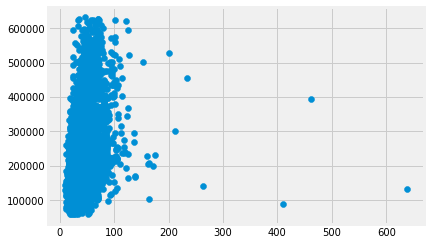

In [101]:
plt.scatter(data['LifeSquare'], data['Price'])

In [102]:
data.loc[data['LifeSquare'] > 119]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
343,716,113,3.0,97.674211,127.477137,19.0,26,24.0,2017,0.050756,...,1,0,1,522197.035995,0,1,0,1,0,1
358,6006,62,3.0,97.674211,122.497641,1.0,3,3.0,1977,0.072158,...,1,0,0,193847.642016,0,1,0,1,1,0
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,...,3,0,2,141780.231857,0,1,0,1,0,1
1397,12638,27,5.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,0,0,0,268394.744389,0,1,0,1,0,1
1641,11055,151,1.0,32.558070,174.837082,15.0,10,12.0,1958,0.236108,...,27,3,10,232766.187698,0,1,0,1,0,1
1867,3267,58,3.0,97.674211,138.004600,43.0,2,2.0,1977,0.437885,...,3,0,5,169528.896664,0,1,0,1,0,1
1981,7917,27,5.0,162.790351,211.231125,0.0,2,3.0,2008,0.211401,...,0,0,1,302211.260887,0,1,0,1,0,1
1982,5548,86,5.0,162.790351,233.949309,26.0,12,37.0,2011,0.161976,...,5,3,7,455264.882666,0,1,1,0,0,1
2603,5621,23,3.0,97.674211,161.504222,12.0,5,3.0,1977,0.014073,...,0,0,0,207007.956663,0,1,0,1,0,1
2708,12570,62,3.0,97.674211,136.697187,15.0,4,3.0,1977,0.072158,...,1,0,0,295412.633601,0,1,0,1,1,0


In [103]:
index_array_lifesquare_2 = data.loc[data['LifeSquare'] > 119].index
index_array_lifesquare_2

Int64Index([ 343,  358,  590, 1397, 1641, 1867, 1981, 1982, 2603, 2708, 3183,
            3368, 3444, 3651, 4047, 4690, 5444, 5743, 6332, 6489, 6977, 8437,
            8511, 8913, 9308, 9895, 9910],
           dtype='int64')

In [104]:
data.loc[index_array_lifesquare_2, 'LifeSquare'] = data.loc[index_array_lifesquare_2, 'Square']*square_ratio

In [105]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.196502,6.281206,8.526548,12.616009,1984.874474,0.118806,...,8.047285,1.319074,4.231717,214145.166434,0.009717,0.990283,0.027550,0.972450,0.082448,0.917552
std,4859.298786,43.595389,0.812404,19.419746,15.898583,28.585835,5.234607,6.770880,18.413935,0.119043,...,23.851710,1.492886,4.808100,92751.005491,0.098102,0.098102,0.163687,0.163687,0.275060,0.275060
min,0.000000,0.000000,1.000000,18.509177,10.523868,0.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4166.250000,20.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153929.816127,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8391.500000,36.000000,2.000000,50.624072,33.658346,6.000000,7.000000,13.000000,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192307.051739,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12588.250000,75.000000,2.000000,65.116140,46.768831,9.000000,12.000000,17.000000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249120.464088,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.000000,209.000000,5.000000,162.790351,118.986655,2014.000000,42.000000,117.000000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Работаем с KitchenSquare:

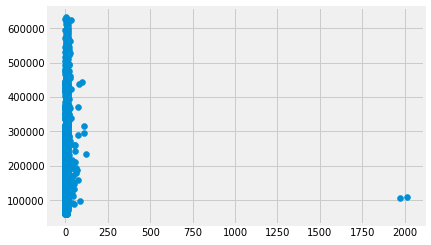

In [106]:
plt.scatter(data['KitchenSquare'], data['Price'])

In [107]:
index_KitchenSquare = data.loc[data['KitchenSquare'] > 22.5].index

In [108]:
KitchenSquare_ratio = (data['KitchenSquare']/data['Square']).mean()
KitchenSquare_ratio

0.1375039363900182

In [109]:
data.loc[index_KitchenSquare, 'KitchenSquare'] = data.loc[index_KitchenSquare, 'KitchenSquare']*KitchenSquare_ratio

Работаем с Floor:

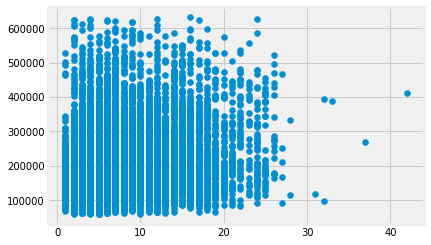

In [110]:
plt.scatter(data['Floor'], data['Price'])

In [111]:
index_Floor = data.loc[data['Floor'] > 30].index

In [112]:
data.loc[index_Floor, 'Floor'] = (data['Floor']).mean()

Работаем с HouseFloor:

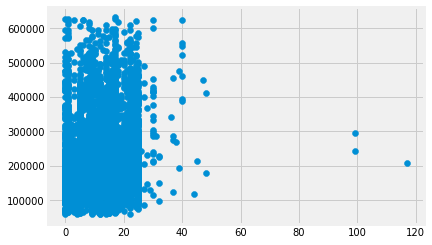

In [113]:
plt.scatter(data['HouseFloor'], data['Price'])

In [114]:
index_HouseFloor = data.loc[data['HouseFloor'] > 30].index

In [115]:
data.loc[index_HouseFloor, 'HouseFloor'] = (data['HouseFloor']).mean()

In [116]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8379.824284,50.421859,1.889201,52.083332,37.196502,5.747482,8.510936,12.522565,1984.874474,0.118806,...,8.047285,1.319074,4.231717,214145.166434,0.009717,0.990283,0.027550,0.972450,0.082448,0.917552
std,4859.298786,43.595389,0.812404,19.419746,15.898583,5.438497,5.194839,6.439609,18.413935,0.119043,...,23.851710,1.492886,4.808100,92751.005491,0.098102,0.098102,0.163687,0.163687,0.275060,0.275060
min,0.000000,0.000000,1.000000,18.509177,10.523868,0.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4166.250000,20.000000,1.000000,32.558070,23.604964,1.000000,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,1.000000,153929.816127,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8391.500000,36.000000,2.000000,50.624072,33.658346,6.000000,7.000000,12.616009,1977.000000,0.075424,...,2.000000,1.000000,3.000000,192307.051739,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12588.250000,75.000000,2.000000,65.116140,46.768831,9.000000,12.000000,17.000000,2001.000000,0.195781,...,5.000000,2.000000,6.000000,249120.464088,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.000000,209.000000,5.000000,162.790351,118.986655,276.932928,28.000000,30.000000,2020.000000,0.521867,...,141.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Этап 5: Строим модель (2 итерация):

In [117]:
train,valid=train_test_split(data,test_size=0.25, random_state=42, shuffle=True)

In [118]:
train.shape, valid.shape

((7486, 22), (2496, 22))

In [119]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [120]:
feats=['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [121]:
model_2b=RF(n_estimators=100,max_depth=7,min_samples_leaf=3, random_state=42)

In [122]:
model_2b.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [123]:
y_pred_2b=model_2b.predict(valid.loc[:,feats])

In [124]:
r2(train['Price'],model_2b.predict(train.loc[:,feats])), r2(valid['Price'],y_pred_2b)

(0.7247045404164251, 0.685262008308225)

### Этап 5: Новые признаки

In [125]:
def join_stats1(df,stats1,source_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='valid':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    return df

In [126]:
stats1=data.groupby(['DistrictId','Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price'})

In [127]:
data=join_stats1(data,stats1,data)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9981
Data columns (total 23 columns):
Id               9982 non-null int64
DistrictId       9982 non-null int64
Rooms            9982 non-null float64
Square           9982 non-null float64
LifeSquare       9982 non-null float64
KitchenSquare    9982 non-null float64
Floor            9982 non-null float64
HouseFloor       9982 non-null float64
HouseYear        9982 non-null int64
Ecology_1        9982 non-null float64
Social_1         9982 non-null int64
Social_2         9982 non-null int64
Social_3         9982 non-null int64
Helthcare_2      9982 non-null int64
Shops_1          9982 non-null int64
Price            9982 non-null float64
Ecology_2_A      9982 non-null uint8
Ecology_2_B      9982 non-null uint8
Ecology_3_A      9982 non-null uint8
Ecology_3_B      9982 non-null uint8
Shops_2_A        9982 non-null uint8
Shops_2_B        9982 non-null uint8
mean_price       9982 non-null float64
dtypes: float64(9), int6

### Этап 6: Строим модель (3 итерация)

In [129]:
train,valid=train_test_split(data,test_size=0.25, random_state=42, shuffle=True)

In [130]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'mean_price'],
      dtype='object')

In [131]:
feats=['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'mean_price']

In [132]:
model_3=RF(n_estimators=100,max_depth=7,min_samples_leaf=3)

In [133]:
%%time
model_3.fit(train.loc[:,feats],train['Price'])

Wall time: 4.29 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [134]:
y_pred_3=model_3.predict(valid.loc[:,feats])

In [135]:
r2(train['Price'],model_3.predict(train.loc[:,feats]))

0.7980014732212292

In [136]:
r2(valid['Price'],y_pred_3)

0.7403905473749293

### Этап 7: Строим модель и прогноз на тестовой выборке:

Обработаем тестовые данные, аналогично тренировочным:

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [138]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [139]:
test = test.drop('Healthcare_1', axis=1)

In [140]:
test.loc[test['HouseYear'] > 2022]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [141]:
test.loc[test['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [142]:
test.loc[test['Rooms']==6,'Rooms']=5

In [143]:
test.loc[test['Rooms']==17,'Rooms']=2

In [144]:
test.loc[test['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [145]:
test.loc[test['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [146]:
test.loc[2406, 'Rooms']=4

In [147]:
test.loc[2524, 'Rooms']=3

In [148]:
test = change_square(test)

In [149]:
square_ratio_t = (test['LifeSquare']/test['Square']).mean()
square_ratio_t

0.7125204506300713

In [150]:
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square']*square_ratio_t)

In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(6), int64(9), object(3)
memory usage: 703.2+ KB


In [152]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908000,52.441048,36.709799,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.808991,19.375242,17.190856,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,32.558070,23.198291,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,51.494132,33.650866,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,65.116140,46.396582,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,5.000000,162.790351,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [153]:
index_array_lifesquare_t = test.loc[test['LifeSquare'] < 9].index
index_array_lifesquare_t

Int64Index([  18,   66,   71,   77,   78,  153,  237,  259,  325,  326,
            ...
            4644, 4680, 4718, 4764, 4795, 4818, 4846, 4863, 4902, 4957],
           dtype='int64', length=108)

In [154]:
test.loc[index_array_lifesquare_t, 'LifeSquare'] = test.loc[index_array_lifesquare_t, 'Square']*square_ratio_t

In [155]:
test.loc[test['LifeSquare'] < 9]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,0.982240,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
608,16401,30,1.0,2.645046,1.884650,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
837,2138,27,1.0,5.647458,4.023930,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B
1165,10120,6,1.0,5.100672,3.634333,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
4490,1165,27,1.0,2.372101,1.690170,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
4540,7855,6,1.0,4.967143,3.539191,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
4902,1420,45,1.0,1.975769,1.407776,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B


In [156]:
test = pd.get_dummies(test)

In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(6), int64(9), uint8(6)
memory usage: 615.3 KB


In [158]:
index_array_lifesquare_2t = test.loc[test['LifeSquare'] > 119].index
index_array_lifesquare_2t

Int64Index([410, 542, 830, 1991, 2081, 2115, 2126, 2557, 2594], dtype='int64')

In [159]:
test.loc[index_array_lifesquare_2t, 'LifeSquare'] = test.loc[index_array_lifesquare_2t, 'Square']*square_ratio_t

In [160]:
KitchenSquare_ratio_t = (test['KitchenSquare']/test['Square']).mean()
KitchenSquare_ratio_t

0.1266765156373711

In [161]:
index_KitchenSquare_t = test.loc[test['KitchenSquare'] > 22.5].index

In [162]:
test.loc[index_KitchenSquare_t, 'KitchenSquare'] = test.loc[index_KitchenSquare_t, 'KitchenSquare']*KitchenSquare_ratio_t

In [163]:
index_Floor_t = test.loc[test['Floor'] > 30].index

In [164]:
test.loc[index_Floor_t, 'Floor'] = (test['Floor']).mean()

In [165]:
index_HouseFloor_t = test.loc[test['HouseFloor'] > 30].index

In [166]:
test.loc[index_HouseFloor_t, 'HouseFloor'] = (test['HouseFloor']).mean()

In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(7), int64(8), uint8(6)
memory usage: 615.3 KB


In [169]:
def join_stats1(df,stats1,source_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    return df

In [170]:
test=join_stats1(test,stats1,data,mode='test')

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
mean_price       5000 non-null float64
dtypes: float64(8), int64(8), uint8(6)
memory usage: 693.4 KB


In [172]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.908000,52.441048,37.289922,5.713755,8.581011,12.468365,1984.392600,0.119874,...,8.262600,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600,214271.395249
std,4832.674037,44.179466,0.808991,19.375242,15.844236,3.953045,5.299310,6.438896,18.573149,0.120070,...,23.863762,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001,71527.745693
min,1.000000,0.000000,1.000000,1.378543,0.982240,0.000000,1.000000,0.000000,1908.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84250.557673
25%,4221.750000,21.000000,1.000000,32.558070,23.198291,1.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,166014.055413
50%,8320.500000,37.000000,2.000000,51.494132,33.967327,6.000000,7.000000,12.000000,1977.000000,0.072158,...,2.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,198777.278269
75%,12598.250000,77.000000,2.000000,65.116140,46.396582,9.000000,12.000000,17.000000,2000.000000,0.195781,...,5.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,246330.217412
max,16795.000000,212.000000,5.000000,162.790351,118.667210,78.539440,28.000000,30.000000,2020.000000,0.521867,...,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,593618.746096


Строим прогноз на тестовой выборке:

In [173]:
test['Price']=model_3.predict(test.loc[:,feats])

In [174]:
test.loc[:, ['Id', 'Price']]

,Id,Price
0,725,165185.378335
1,15856,240960.227282
2,5480,233280.235115
3,15664,244288.341582
4,14275,128853.947196
5,7633,198647.615560
6,13329,163003.289797
7,5502,204343.164682
8,4220,321079.725793
9,11538,218341.230237


In [175]:
test.loc[:,['Id','Price']].to_csv('ABolilyy_predictions.csv',index=None)

In [176]:
pd.read_csv('ABolilyy_predictions.csv')

,Id,Price
0,725,165185.378335
1,15856,240960.227282
2,5480,233280.235115
3,15664,244288.341582
4,14275,128853.947196
5,7633,198647.615560
6,13329,163003.289797
7,5502,204343.164682
8,4220,321079.725793
9,11538,218341.230237
